In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
with open('data/t10k-images-idx3-ubyte', 'rb') as f:
    x_data = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28 * 28)

with open('data/t10k-labels-idx1-ubyte', 'rb') as f:
    y_data = np.frombuffer(f.read(), np.uint8, offset=8)

In [3]:
28 * 28

784

In [4]:
x_data.shape, y_data.shape

((10000, 784), (10000,))

In [5]:
x_data.min(), x_data.max()

(0, 255)

In [6]:
x_data = x_data / 255

x_data.min(), x_data.max()

(0.0, 1.0)

In [7]:
y_data.min(), y_data.max()

(0, 9)

7


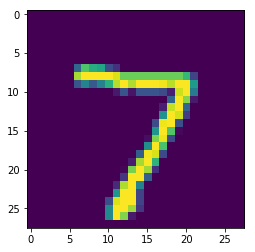

In [8]:
images = x_data.reshape(-1, 28, 28)

print(y_data[0])

plt.imshow(images[0])
plt.show()

[[1 2 2]
 [0 4 2]
 [1 4 1]]


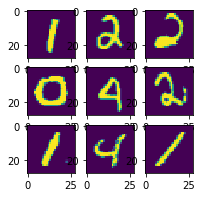

In [9]:
shuffle = np.random.permutation(x_data.shape[0])[:9]

print(y_data[shuffle].reshape(3, 3))

plt.figure(figsize=(3, 3))

for i, index in enumerate(shuffle):
    plt.subplot2grid((3, 3), (i // 3, i % 3))
    plt.imshow(images[index])

plt.show()

In [10]:
train_x_data = x_data[1000:]
train_y_data = y_data[1000:]

test_x_data = x_data[:1000]
test_y_data = y_data[:1000]

test_images = images[:1000]

In [11]:
def batch(data, index, size):
    offset = index * size
    return data[offset:offset + size]

batch_size = 100
num_batches = train_x_data.shape[0] // batch_size

train_x_data.shape[0], batch_size, num_batches

(9000, 100, 90)

In [12]:
train_x_batches = [batch(train_x_data, i, batch_size) for i in range(num_batches)]
train_y_batches = [batch(train_y_data, i, batch_size) for i in range(num_batches)]

In [13]:
np.eye(10)

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [14]:
def onehot(data):
    return np.eye(10)[data]

onehot([0, 9, 1, 8])

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.]])

In [15]:
def print_accuracy():
    predict = session.run(label, feed_dict=test_data)
    correct = predict == y_data[:1000]
    print('accuracy = %f' % np.mean(correct))

def draw():
    predict = session.run(label, feed_dict=test_data)
    correct = predict == test_y_data
    print(predict[~correct][:9].reshape(3, 3))
    print(test_y_data[~correct][:9].reshape(3, 3))
    incorrect_images = test_images[~correct][:9]
    plt.figure(figsize=(3, 3))
    for i, image in enumerate(incorrect_images):
        plt.subplot2grid((3, 3), (i // 3, i % 3))
        plt.imshow(image)
    plt.show()

In [16]:
x = tf.placeholder(tf.float32, [None, 28 * 28])
y = tf.placeholder(tf.float32, [None, 10])

w = tf.Variable(tf.truncated_normal([28 * 28, 10], stddev=0.1))
b = tf.Variable(tf.truncated_normal([10], stddev=0.1))

u = tf.matmul(x, w) + b
z = tf.nn.softmax(u)

label = tf.argmax(z, axis=1)

cross_entropy = -tf.reduce_sum(y * tf.log(z), axis=1)
loss = tf.reduce_mean(cross_entropy)

train = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

1
loss = 2.480948
loss = 2.045453
loss = 1.686487
loss = 1.432156
loss = 1.296934
loss = 1.140356
loss = 0.897843
loss = 0.691986
loss = 0.871672
accuracy = 0.760000
----------------------------------
2
loss = 0.947018
loss = 1.031686
loss = 0.713354
loss = 0.759489
loss = 0.625409
loss = 0.723702
loss = 0.491330
loss = 0.427569
loss = 0.650728
accuracy = 0.811000
----------------------------------
3
loss = 0.716529
loss = 0.850251
loss = 0.531714
loss = 0.630870
loss = 0.484849
loss = 0.606242
loss = 0.373034
loss = 0.344453
loss = 0.569131
accuracy = 0.829000
----------------------------------
4
loss = 0.621570
loss = 0.764543
loss = 0.452449
loss = 0.572375
loss = 0.423723
loss = 0.546062
loss = 0.313878
loss = 0.301330
loss = 0.522608
accuracy = 0.851000
----------------------------------
5
loss = 0.566928
loss = 0.710822
loss = 0.406642
loss = 0.537160
loss = 0.388933
loss = 0.508041
loss = 0.277332
loss = 0.274185
loss = 0.491062
accuracy = 0.857000
------------------------------

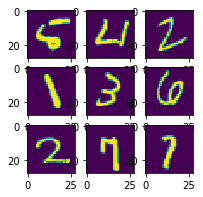

In [17]:
session = tf.Session()
session.run(tf.global_variables_initializer())

test_data = {
    x: test_x_data
}

for i in range(10):
    print(i + 1)
    for index in range(num_batches):
        data = {
            x: train_x_batches[index],
            y: onehot(train_y_batches[index])
        }
        session.run(train, feed_dict=data)
        if index % 10 == 0:
            print('loss = %f' % session.run(loss, feed_dict=data))
    print_accuracy()
    print('----------------------------------')

draw()

In [18]:
x = tf.placeholder(tf.float32, [None, 28 * 28])
y = tf.placeholder(tf.float32, [None, 10])

# Hidden Layer

h_w = tf.Variable(tf.truncated_normal([28 * 28, 200], stddev=0.1))
h_b = tf.Variable(tf.truncated_normal([200], stddev=0.1))

h_u = tf.matmul(x, h_w) + h_b
h_z = tf.nn.relu(h_u)

# Output Layer

w = tf.Variable(tf.truncated_normal([200, 10], stddev=0.1))
b = tf.Variable(tf.truncated_normal([10], stddev=0.1))

u = tf.matmul(h_z, w) + b
z = tf.nn.softmax(u)

label = tf.argmax(z, axis=1)

cross_entropy = -tf.reduce_sum(y * tf.log(z), axis=1)
loss = tf.reduce_mean(cross_entropy)

train = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

1
loss = 2.357692
loss = 1.954215
loss = 1.521489
loss = 1.159795
loss = 1.155701
loss = 0.938746
loss = 0.662315
loss = 0.559370
loss = 0.670797
accuracy = 0.773000
----------------------------------
2
loss = 0.752130
loss = 0.842885
loss = 0.539067
loss = 0.552344
loss = 0.470971
loss = 0.541023
loss = 0.298264
loss = 0.304459
loss = 0.433091
accuracy = 0.831000
----------------------------------
3
loss = 0.533573
loss = 0.647811
loss = 0.389438
loss = 0.441655
loss = 0.345507
loss = 0.437074
loss = 0.205598
loss = 0.235673
loss = 0.342524
accuracy = 0.864000
----------------------------------
4
loss = 0.446398
loss = 0.556414
loss = 0.330261
loss = 0.390161
loss = 0.290781
loss = 0.379977
loss = 0.161651
loss = 0.203148
loss = 0.291677
accuracy = 0.879000
----------------------------------
5
loss = 0.396729
loss = 0.499383
loss = 0.297675
loss = 0.358811
loss = 0.258495
loss = 0.340807
loss = 0.135785
loss = 0.183042
loss = 0.257557
accuracy = 0.889000
------------------------------

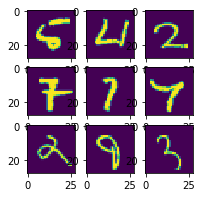

In [19]:
session = tf.Session()
session.run(tf.global_variables_initializer())

test_data = {
    x: test_x_data
}

for i in range(10):
    print(i + 1)
    for index in range(num_batches):
        data = {
            x: train_x_batches[index],
            y: onehot(train_y_batches[index])
        }
        session.run(train, feed_dict=data)
        if index % 10 == 0:
            print('loss = %f' % session.run(loss, feed_dict=data))
    print_accuracy()
    print('----------------------------------')

draw()

In [20]:
# CNN

x = tf.placeholder(tf.float32, [None, 28 * 28])
y = tf.placeholder(tf.float32, [None, 10])

keep_prob = tf.placeholder(tf.float32)

xx = tf.reshape(x, [-1, 28, 28, 1])

def conv(x, in_ch, out_ch):
    w = tf.Variable(tf.truncated_normal([5, 5, in_ch, out_ch], stddev=0.1))
    b = tf.Variable(tf.truncated_normal([out_ch], stddev=0.1))
    u = tf.nn.conv2d(x, w, strides=[1, 1, 1, 1], padding='SAME') + b
    return tf.nn.relu(u)

def pool(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

z1 = conv(xx, 1, 8)
z2 = pool(z1)

z3 = conv(z2, 8, 16)
z4 = pool(z3)

fc_size = (28 // 4) * (28 // 4) * 16
fc_z = tf.reshape(z4, [-1, fc_size])

# Hidden Layer

h_w = tf.Variable(tf.truncated_normal([fc_size, 1000], stddev=0.1))
h_b = tf.Variable(tf.truncated_normal([1000], stddev=0.1))

h_u = tf.matmul(fc_z, h_w) + h_b
h_z = tf.nn.relu(h_u)

# Dropout

drop = tf.nn.dropout(h_z, keep_prob)

# Output Layer

w = tf.Variable(tf.truncated_normal([1000, 10], stddev=0.1))
b = tf.Variable(tf.truncated_normal([10], stddev=0.1))

u = tf.matmul(h_z, w) + b
z = tf.nn.softmax(u)

label = tf.argmax(z, axis=1)

cross_entropy = -tf.reduce_sum(y * tf.log(z), axis=1)
loss = tf.reduce_mean(cross_entropy)

train = tf.train.AdamOptimizer(0.001).minimize(loss)

In [21]:
xx.shape, z2.shape, z4.shape, h_z.shape, z.shape

(TensorShape([Dimension(None), Dimension(28), Dimension(28), Dimension(1)]),
 TensorShape([Dimension(None), Dimension(14), Dimension(14), Dimension(8)]),
 TensorShape([Dimension(None), Dimension(7), Dimension(7), Dimension(16)]),
 TensorShape([Dimension(None), Dimension(1000)]),
 TensorShape([Dimension(None), Dimension(10)]))

1
loss = 2.206897
loss = 1.068760
loss = 0.422504
loss = 0.417262
loss = 0.229941
loss = 0.340613
loss = 0.114765
loss = 0.174465
loss = 0.369891
accuracy = 0.898000
----------------------------------
2
loss = 0.379142
loss = 0.265643
loss = 0.223668
loss = 0.179976
loss = 0.085177
loss = 0.231891
loss = 0.051890
loss = 0.059037
loss = 0.078433
accuracy = 0.930000
----------------------------------
3
loss = 0.196914
loss = 0.142453
loss = 0.157722
loss = 0.099308
loss = 0.056177
loss = 0.042425
loss = 0.017350
loss = 0.081045
loss = 0.033910
accuracy = 0.959000
----------------------------------
4
loss = 0.130260
loss = 0.067924
loss = 0.074262
loss = 0.057932
loss = 0.026867
loss = 0.018063
loss = 0.006818
loss = 0.050219
loss = 0.014565
accuracy = 0.973000
----------------------------------
5
loss = 0.088325
loss = 0.043476
loss = 0.034902
loss = 0.035868
loss = 0.009607
loss = 0.009754
loss = 0.004982
loss = 0.026232
loss = 0.008507
accuracy = 0.978000
------------------------------

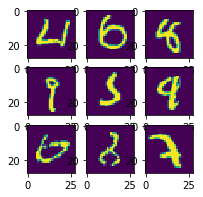

In [22]:
session = tf.Session()
session.run(tf.global_variables_initializer())

test_data = {
    x: test_x_data,
    keep_prob: 1.0
}

for i in range(10):
    print(i + 1)
    for index in range(num_batches):
        data = {
            x: train_x_batches[index],
            y: onehot(train_y_batches[index]),
            keep_prob: 0.5
        }
        session.run(train, feed_dict=data)
        if index % 10 == 0:
            print('loss = %f' % session.run(loss, feed_dict=data))
    print_accuracy()
    print('----------------------------------')

draw()